In [25]:
import keras
from keras import backend as K
K.set_image_dim_ordering('th')

In [29]:
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.utils import np_utils
def data_loading(data_name,
                 input_reshape=False,input_reshape_size = [3, 32, 32],
                data_normalization=False,
                class_categorical=False, class_num=10):
    if data_name == "cifar10":
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    elif data_name == "mnist":
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    
    
    def data_reshape(X_train, X_test, input_channel, image_x, image_y):
        X_train = X_train.reshape(X_train.shape[0],input_channel, image_x, image_y)
        X_test = X_test.reshape(X_test.shape[0],input_channel, image_x, image_y)
        return X_train,X_test
    
    def normalization(X_train, X_test):
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        X_train /= 255
        X_test /= 255
        return X_train,X_test
    
    def categorical(y_train,y_test,class_num):
        Y_train = np_utils.to_categorical(y_train, class_num)
        Y_test = np_utils.to_categorical(y_test, class_num)
        return Y_train,Y_test
    
    if input_reshape:
        X_train,X_test = data_reshape(X_train, X_test, 
                                      input_reshape_size[0], 
                                      input_reshape_size[1],
                                      input_reshape_size[2],)
        

    if data_normalization:
        X_train,X_test = normalization(X_train, X_test)
        
    if class_categorical:
        y_train,y_test = categorical(y_train,y_test,class_num)
    
    return X_train,y_train,X_test,y_test


def data_info(X_train,y_train,X_test,y_test):
    assert X_train.shape[0] == y_train.shape[0]
    assert X_test.shape[0] == y_test.shape[0]
    assert X_train.shape[1:] == X_test.shape[1:]
    assert y_train.shape[1:] == y_test.shape[1:]
    info = {}
    info["num_train"] = X_train.shape[0]
    info["num_test"] = X_test.shape[0]
    info["input_shape"] = X_train.shape[1:]
    info["output_shape"] = y_train.shape[1:]
    
    return info

In [21]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

def BuildNetwork(input_shape=[3,32,32],num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [22]:
model = BuildNetwork(input_shape=[3,32,32],num_classes=10)
print(model.output_shape)

(None, 10)


In [27]:
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
loss = "categorical_crossentropy"
metric = ["categorical_accuracy"]
model.compile(loss=loss,
              optimizer=opt,
              metrics=metric)


In [30]:
X_train,y_train,X_test,y_test = data_loading("cifar10",True,[3,32,32],True,True,10)
model.fit(x=X_train,y=y_train,batch_size=10,epochs=5,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 284us/step - loss: 1.8196 - categorical_accuracy: 0.3278 - val_loss: 1.5821 - val_categorical_accuracy: 0.4160
Epoch 2/5
50000/50000 [==============================] - 14s 272us/step - loss: 1.6157 - categorical_accuracy: 0.4140 - val_loss: 1.5398 - val_categorical_accuracy: 0.4520
Epoch 3/5
50000/50000 [==============================] - 14s 282us/step - loss: 1.5997 - categorical_accuracy: 0.4229 - val_loss: 1.5125 - val_categorical_accuracy: 0.4634
Epoch 4/5
50000/50000 [==============================] - 15s 296us/step - loss: 1.6434 - categorical_accuracy: 0.4134 - val_loss: 1.5044 - val_categorical_accuracy: 0.4756
Epoch 5/5
50000/50000 [==============================] - 14s 288us/step - loss: 1.6641 - categorical_accuracy: 0.4068 - val_loss: 1.5904 - val_categorical_accuracy: 0.4352


In [41]:
import numpy as np
model = typical_net("VGG16",False,[3,224,224],10)
print(model.output_shape)
weights = model.get_weights()
print(weights[6].shape)

(None, 512, 7, 7)
(3, 3, 128, 128)


In [14]:
X_train,y_train,X_test,y_test = data_loading("cifar10",True,[3,32,32],True,True,10)
info = data_info(X_train,y_train,X_test,y_test)

In [15]:
print(info)

{'num_train': 60000, 'output_shape': (10,), 'num_test': 10000, 'input_shape': (1, 28, 28)}


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

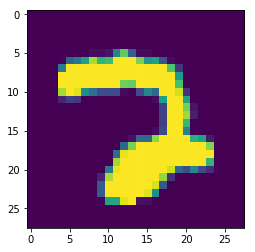

In [18]:
plt.imshow(X_train[120,0])